# Seaborn intro

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

In [3]:
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

## without Seaborn

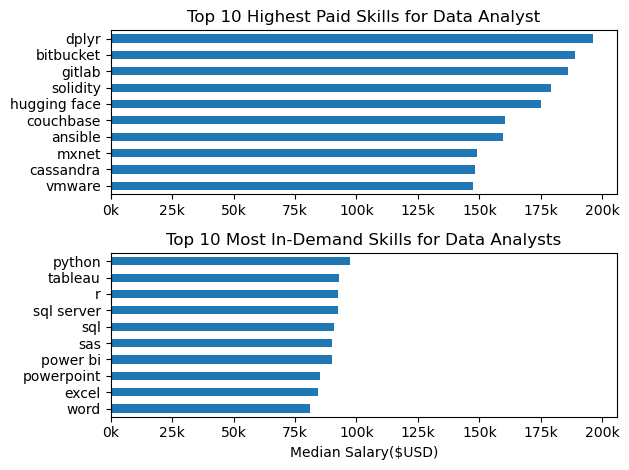

In [4]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)


df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))
ax[1].set_xlabel('Median Salary($USD)')

fig.tight_layout()

## with Seaborn

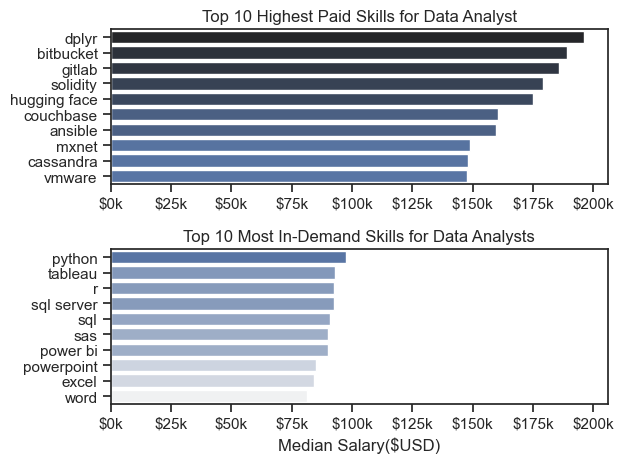

In [18]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")


sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].set_xlabel('Median Salary($USD)')

fig.tight_layout()

## without Seaborn

Text(0, 0.5, 'Number of Jobs')

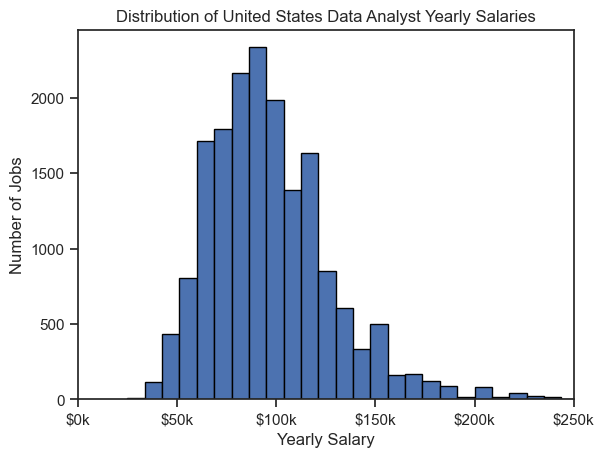

In [19]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins = 40, edgecolor='black')

plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

## with Seaborn

Text(12.444444444444445, 0.5, 'Number of Jobs')

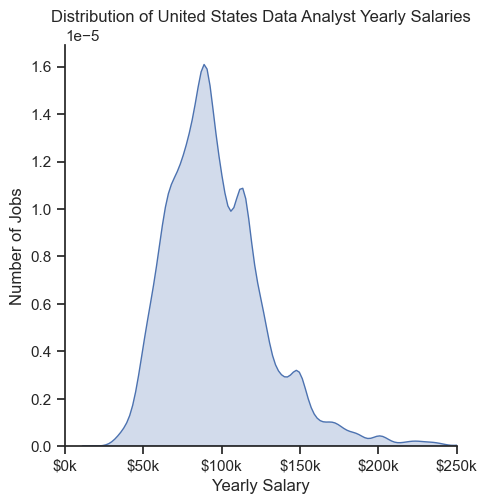

In [22]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill= True)

plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

## without Seaborn

/var/folders/p0/rl5q6h9933b1gn010v9h_c4r0000gn/T/ipykernel_36301/727958452.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


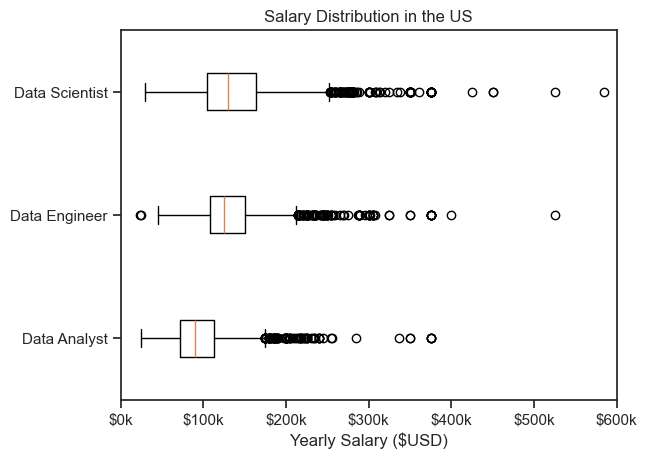

In [23]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg']for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()


## with Seaborn

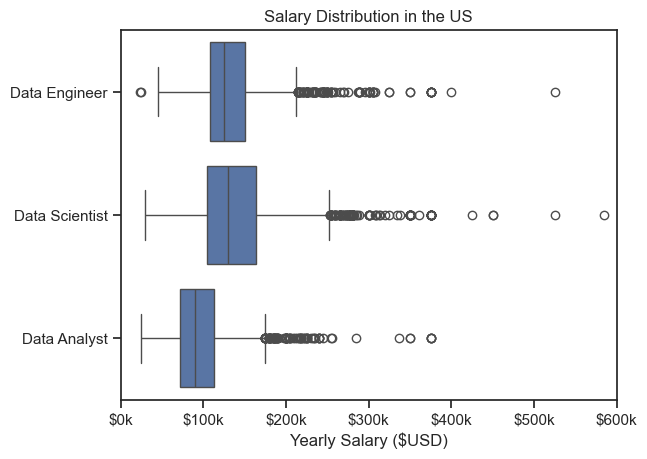

In [26]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()